In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
tabla_1 = pd.read_csv("BARD_1976-1993_KPVT_tilts.csv")
tabla_2 = pd.read_csv('BARD_1992-1999_SPMG_tilts.csv')
tabla_3 = pd.read_csv('BARD_1996-2010_MDI_tilts.csv')
tabla_4 = pd.read_csv('BARD_2010-2016_HMI_tilts.csv')

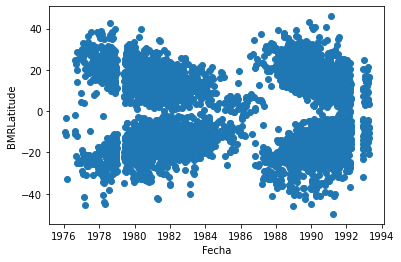

In [13]:
tiempo = pd.to_datetime(tabla_1.loc[:,['Year','Month','Day','Hour','Minute','Second']])

plt.scatter(tiempo, tabla_1['BMRLatitude'])
plt.xlabel('Fecha')
plt.ylabel('BMRLatitude')
plt.show()

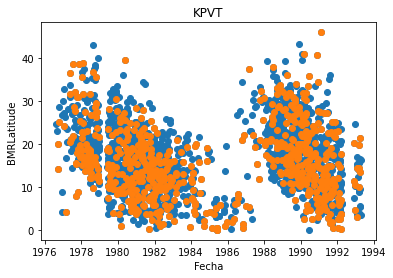

In [21]:
mascara = tabla_1['BMRLatitude'] > 0

plt.scatter(tiempo[mascara], tabla_1.loc[mascara, 'BMRLatitude'])
plt.xlabel('Fecha')
plt.ylabel('BMRLatitude')

mascara = np.logical_and(mascara, tabla_1['Tilt_rel'] > 0)

plt.scatter(tiempo[mascara], tabla_1.loc[mascara, 'BMRLatitude'])
plt.title('KPVT')
plt.xlabel('Fecha')
plt.ylabel('BMRLatitude')
plt.show()

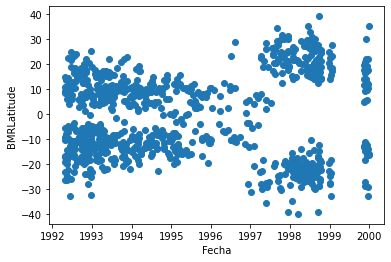

In [9]:
# revisar scatter
# tamaño proporcional al flujo magnetico / color determinado por tilt (inclinacion)
# densidad es mejor perceptualy colormap
# cantidades positivas/negativas diverging es mejor (probar coolwarm)

# plot BMRLongitud vs BMRLatitude (y)
# color con tiempo (color secuencial como viridis)

# EXTRAS
# hacer plot con division de 2 meses con reference day (60 dias)


tiempo_2 = pd.to_datetime(tabla_2.iloc[:,[1,2,3,4,5,6]])

plt.scatter(tiempo_2, tabla_2['BMRLatitude'])
plt.xlabel('Fecha')
plt.ylabel('BMRLatitude')
plt.show()

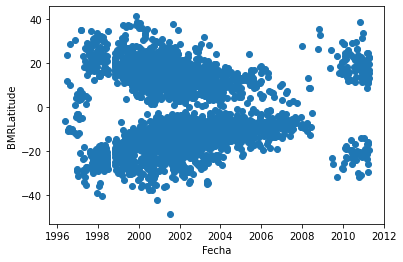

In [10]:
tiempo_3 = pd.to_datetime(tabla_3.iloc[:,[1,2,3,4,5,6]])

plt.scatter(tiempo_3, tabla_3['BMRLatitude'])
plt.xlabel('Fecha')
plt.ylabel('BMRLatitude')
plt.show()